# Определение оригинал/кавер для музыкальных треков

Решение для хакатона  
Заказчик: Яндекс.Музыка

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span><ul class="toc-item"><li><span><a href="#Описание-принципа-решения" data-toc-modified-id="Описание-принципа-решения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание принципа решения</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Разметка-каверов" data-toc-modified-id="Разметка-каверов-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Разметка каверов</a></span></li><li><span><a href="#Метаинформация" data-toc-modified-id="Метаинформация-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Метаинформация</a></span></li><li><span><a href="#Тексты-песен" data-toc-modified-id="Тексты-песен-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Тексты песен</a></span></li></ul></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Data-introdution" data-toc-modified-id="Data-introdution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data introdution</a></span><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Info" data-toc-modified-id="Info-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Info</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>EDA</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Определение-языка-по-тексту" data-toc-modified-id="Определение-языка-по-тексту-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Определение языка по тексту</a></span></li><li><span><a href="#Декодирование-ISRC" data-toc-modified-id="Декодирование-ISRC-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Декодирование ISRC</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-лишних-данных" data-toc-modified-id="Удаление-лишних-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Удаление лишних данных</a></span></li><li><span><a href="#Объединение-исходных-данных" data-toc-modified-id="Объединение-исходных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Объединение исходных данных</a></span></li><li><span><a href="#Отбор-размеченных-данных" data-toc-modified-id="Отбор-размеченных-данных-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Отбор размеченных данных</a></span><ul class="toc-item"><li><span><a href="#ORIGINAL-и-COVER" data-toc-modified-id="ORIGINAL-и-COVER-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>ORIGINAL и COVER</a></span></li><li><span><a href="#Создание-положительных-примеров" data-toc-modified-id="Создание-положительных-примеров-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Создание положительных примеров</a></span></li><li><span><a href="#Создание-отрицательных-пар" data-toc-modified-id="Создание-отрицательных-пар-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Создание отрицательных пар</a></span></li></ul></li><li><span><a href="#Финальное-заполнение-пропусков" data-toc-modified-id="Финальное-заполнение-пропусков-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Финальное заполнение пропусков</a></span></li><li><span><a href="#Разделение-на-train-и-valid" data-toc-modified-id="Разделение-на-train-и-valid-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Разделение на train и valid</a></span></li><li><span><a href="#Объединение-pos-и-neg" data-toc-modified-id="Объединение-pos-и-neg-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Объединение pos и neg</a></span></li><li><span><a href="#valid_original_track_id" data-toc-modified-id="valid_original_track_id-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>valid_original_track_id</a></span></li><li><span><a href="#Удаление-&quot;хвостов&quot;" data-toc-modified-id="Удаление-&quot;хвостов&quot;-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Удаление "хвостов"</a></span></li><li><span><a href="#Выделение-признаков-и-таргета" data-toc-modified-id="Выделение-признаков-и-таргета-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Выделение признаков и таргета</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#CatBoostClassifier-и-метрики-модели" data-toc-modified-id="CatBoostClassifier-и-метрики-модели-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>CatBoostClassifier и метрики модели</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#df_test" data-toc-modified-id="df_test-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>df_test</a></span></li><li><span><a href="#Ранжирование-треков-на-примере-одного-из-кластеров" data-toc-modified-id="Ранжирование-треков-на-примере-одного-из-кластеров-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Ранжирование треков на примере одного из кластеров</a></span></li><li><span><a href="#Ранжирование-треков-(функция)" data-toc-modified-id="Ранжирование-треков-(функция)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Ранжирование треков (функция)</a></span></li></ul></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Кластеризация</a></span><ul class="toc-item"><li><span><a href="#text-to-embeds" data-toc-modified-id="text-to-embeds-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>text to embeds</a></span></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#FAISS" data-toc-modified-id="FAISS-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>FAISS</a></span><ul class="toc-item"><li><span><a href="#Создание" data-toc-modified-id="Создание-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Создание</a></span></li><li><span><a href="#Поиск" data-toc-modified-id="Поиск-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Поиск</a></span></li><li><span><a href="#Оценка-порога-(максимального-расстояния)-отнесения-пары-треков-к-одному-кластеру" data-toc-modified-id="Оценка-порога-(максимального-расстояния)-отнесения-пары-треков-к-одному-кластеру-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Оценка порога (максимального расстояния) отнесения пары треков к одному кластеру</a></span></li></ul></li></ul></li></ul></div>

## Intro

### Описание принципа решения

1. Создание модели для предсказания, какой из двух треков более вероятно является оригиналом.
    1. Отбор размеченных групп. В группе обязательно должен присутствовать оригинал и не менее 1 кавера.
    2. Создание позитивных примеров. Из отобранных данных будут составлены пары ORIGINAL–COVER, где COVER — это кавер на конкретный ORIGINAL. Таргет для таких пар будет равен 'ORIGINAL'.
    3. Создание негативных примеров. Все позитивные примеры будут инвертированы: настоящий оригинал будет выдан за кавер, а кавер — за оригинал. Таргет для таких пар будет равен 'COVER'.
    4. Обучение модели, которая должна научиться по признакам определять таргет. Поскольку оригиналы будут повторяться в данных (каждому оригиналу может соответствовать более одного кавера), необходимо предпринять меры против утечки данных. Каждый оригинальный трек должен попасть либо в обучающую, либо в валидационную (тестовую) выборку.
1. Тестирование модели на размеченных данных.
    1. Для тестирования будут использованы размеченные данные из валидационной выборки. Модель видела эти данные только при контроле переобучения: не идеально, но для создания отдельной тестовой выборки крайне мало данных. Если принципиально, можно сделать отдельную тестовую выборку или обучить модель без валидационной выборки.
    2. Для каждого кластера создаются все возможные пары треков (cross-tab).
    3. С помощью созданной модели для каждой составленной пары оценивается вероятность каждого из треков пары быть "более оригинальным" (в сумме 1).
    4. Для каждого трека рассчитывается его среднее значение вероятностей быть оригинальным, по всем парам, где встречается этот трек. Это будет оценкой для ранжирования треков.
    5. Треки ранжируются по рассчитанной выше оценке. Наибольшую оценку имееет предполагаемый оригинал.
    6. Нужно отметить, что модель может дать низкую оценку треку, помеченному в исходных данных как оригинал, ориентируясь на его признаки. Например, такой размеченный оригинал имеет более позднюю дату выхода, чем его каверы.
1. Кластеризация (пока в стадии экспериментов).
    1. Из текстов треков получены эмбединги.
    2. Создан индекс FAISS, в который загружены все эмбединги. (можно рассмотреть и другие алгоритмы кластеризации)
    3. На основе размеченных данных предполагается оценить порог расстояния между треками, для последующей кластеризации треков по текстам.
1. Запуск на неразмеченных данных (еще не реализован).
    1. Для любого трека определить кластер похожих треков, исходя из установленного порога схожести текстов.
    1. Для кластеризованных данных применить созданную модель, чтобы ранжировать кластер по убыванию оценки быть оригиналом.

### Описание данных

#### Разметка каверов

Файл **covers.json** содержит разметку каверов, сделанную редакторами сервиса:
   - `track_id` – уникальный идентификатор трека;
   - `original_track_id` – уникальный идентификатор исходного трека;
   - `track_remake_type` – метка, присвоенная редакторами. Может принимать значения ORIGINAL и COVER.

#### Метаинформация

Файл **meta.json** содержит следующую информацию:
   - `track_id` – уникальный идентификатор трека;
   - `dttm` – первая дата появления информации о треке;
   - `title` – название трека;
   - `language` – язык исполнения;
   - `isrc` – международный уникальный идентификатор трека;
   - `genres` – жанры;
   - `duration` – длительность трека.

#### Тексты песен

Файл **lyrics.json** содержит следующую информацию:
   - `track_id` – уникальный идентификатор трека;
   - `lyricId` – уникальный идентификатор текста;
   - `text` – текст трека.

### Imports

In [1]:
import pandas as pd
import numpy as np

import warnings
import os
import re
import json
from tqdm import tqdm
from pandarallel import pandarallel

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

from langdetect import detect, LangDetectException
from sentence_transformers import SentenceTransformer, util
import faiss

from sklearn.model_selection import GroupShuffleSplit

from catboost import CatBoostClassifier, cv, Pool

import torch

### Constants

In [2]:
# common constants

CR = '\n'                                              # new line
RS = RANDOM_STATE = RANDOM_SEED = 888                  # random_state

In [3]:
# path constants

PATH_SWITCH = 'local'                                  # available options are 'local' or 'remote' to choose data source
PATH_DATA_LOCAL = 'datasets/'                          # local path to data
PATH_DATA_REMOTE = '/kaggle/input/mydatasets/'         # remote path to data

PATH_DATA = PATH_DATA_LOCAL if PATH_SWITCH == 'local' else PATH_DATA_REMOTE   # choose whether local or remote path to data

In [4]:
TARGET = 'target'                                      # target name
TRAIN_FRAC = 0.50                                      # train sampling fraction

# SCORING = 'f1'                                         # target metric
# N_CV = 5                                               # number of folds during cross-validation

# N_TRIALS = 50                                          # max of tries when Optuna optimization run
# TIMEOUT = 60                                           # max time when Optuna optimization run
# MAX_TIME = 60                                          # max time per one net-model training and evaluating

In [ ]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Settings

In [6]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [7]:
# charts defaults

# Matplotlib, Seaborn
PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# colors, color schemes
CMAP_SYMMETRIC = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [8]:
# Pandas
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

tqdm.pandas()

In [ ]:
# Pandarallel
pandarallel.initialize(progress_bar=True)

In [10]:
# # # Optuna defaults
# optuna.logging.set_verbosity(optuna.logging.WARNING)  # отключение вывода логов при работе optuna

In [11]:
# others
warnings.filterwarnings('ignore')

## Data introdution

### Load

In [12]:
data_covers = pd.read_json(os.path.join(PATH_DATA, 'covers.json'), lines=True)
data_lyrics = pd.read_json(os.path.join(PATH_DATA, 'lyrics.json'), lines=True)
data_meta = pd.read_json(os.path.join(PATH_DATA, 'meta.json'), lines=True)

### Info

In [13]:
data_covers.head(2)

,original_track_id,track_id,track_remake_type
0,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
1,fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL


In [14]:
data_covers.shape

(71597, 3)

In [15]:
data_lyrics.head(2)

,lyricId,text,track_id
0,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\nПопытками не то любить, что нужно\nТеряю смысл, ну...",1c4b1230f937e4c548ff732523214dcd
1,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fable\nTell me your fable\nTell me your fable\nA fable...,0faea89b0d7d6235b5b74def72511bd8


In [16]:
data_lyrics.shape

(11414, 3)

In [17]:
data_meta.head(2)

,track_id,dttm,title,language,isrc,genres,duration
0,c3b9d6a354ca008aa4518329aaa21380,1639688400000.000,Happy New Year,EN,RUB422103970,[DANCE],161120.000
1,c57e3d13bbbf5322584a7e92e6f1f7ff,1637762433000.000,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.000


In [18]:
data_meta.shape

(71769, 7)

### Duplicates

In [19]:
data_covers = data_covers.drop_duplicates(subset=['track_id'])
data_covers.shape

(71597, 3)

In [20]:
data_lyrics = data_lyrics.drop_duplicates(subset=['track_id'])
data_lyrics.shape

(10277, 3)

In [21]:
data_meta = data_meta.drop_duplicates(subset=['track_id'])
data_meta.shape

(71769, 7)

### EDA

Здесь можно собирать всякие инсайты.

## Feature Engineering

### Определение языка по тексту

In [22]:
def detect_language(text):

    from langdetect import detect, LangDetectException      # импорт внутри функции, иначе не работает с parallel_apply
    
    try:
        return detect(text).upper()
    except LangDetectException:
        return 'unknown'                                    # если не удалось определить язык

In [23]:
# %%time

#  data_lyrics['text_lang'] = data_lyrics['text'].progress_apply(detect_language)

In [24]:
%%time

data_lyrics['text_lang'] = data_lyrics['text'].parallel_apply(detect_language)

CPU times: total: 359 ms
Wall time: 19.6 s


In [25]:
data_lyrics.sample()

,lyricId,text,track_id,text_lang
9305,f008e4edcc22f12b5ed6742493105177,"Пьяные ночи заменили мне наши рассветы\nЗнак многоточий после слов о любви\nЗлят, между прочим, ...",56d088db7046725ff6b22b4d7cf14d8b,RU


### Декодирование ISRC

Описание кодировки ISRC вида CCLLLYYNNNNN:
  - CC : 2 символа, страна регистрации;
  - LLL : 3 символа, издатель (исполнитель/лейбл);
  - YY : 2 символа, год релиза трека;
  - NNNNN : 5 символов - номер трека.

In [26]:
data_meta = data_meta.dropna(subset='isrc')

In [27]:
data_meta['country'] = [x[0:2] for x in data_meta.isrc]
data_meta['owner'] = [x[2:5] for x in data_meta.isrc]
data_meta['year_release'] = [x[5:7] for x in data_meta.isrc]

In [28]:
# правка ошибок
data_meta.year_release = data_meta.year_release.replace('5-', '05')

In [29]:
data_meta.year_release = data_meta.year_release.astype(int).apply(lambda x: 1900 + x if x > 23 else 2000 + x)

> Из-за двухциферной кодировки года не исключено наложение двух столетий.

In [30]:
data_meta.value_counts('year_release').sort_index(ascending=False)

year_release
2023      712
2022    13657
2021    25007
2020     9248
2019     4702
2018     1705
2017     3477
2016      923
2015     1276
2014     1052
2013      654
2012     1280
2011      813
2010     1458
2009     1374
2008      504
2007      319
2006     1231
2005      581
2004      204
2003      101
2002       65
2001       78
2000      496
1999      122
1998       61
1997       21
1996       21
1995       11
1994       16
1993       12
1992       15
1991       15
1990       12
1989       10
1988       11
1987       10
1986       12
1985       14
1984       15
1983        7
1982       11
1981       13
1980        8
1979        8
1978        5
1977        7
1976        4
1975        2
1974        4
1973        6
1971        2
1970        7
1969        4
1968        5
1967        4
1966        8
1965        5
1964        1
1963        3
1962        2
1960        5
1958        1
1957        1
1954        1
1951        3
1950        2
1944        1
1942        2
1938        1
1936   

### Заполнение пропусков

Временное

In [31]:
# data_covers = data_covers.fillna(0)
# data_lyrics = data_lyrics.fillna(0)
# data_meta = data_meta.fillna(0)

## Подготовка данных

### Удаление лишних данных

In [32]:
data_meta = data_meta.drop(['dttm', 'genres', 'isrc', 'language'], axis=1)
data_lyrics = data_lyrics.drop(['lyricId'], axis=1)

> Для такого очень маленького количества данных, которое будет использовано для обучения модели, количество жанров слишком велико.  
> На будущеее, жанр — один их потенциально значимых признаков для определения оригинала/кавера.

### Объединение исходных данных

In [33]:
data = data_covers.merge(data_meta.drop(['title'], axis=1), on='track_id').merge(data_lyrics.drop(['text'], axis=1), on='track_id', how='left')

> Текст и название трека на данном этапе не используются, потому что в основном характеризуют определенный кластер.  
> Позднее можно выделить из текста признаки, менее заивисимые от кластера и более общие для данных в целом (например, всякие "хей-хоп-ла-ла-лей" и прочие дописки, характерные для каверов).

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71287 entries, 0 to 71286
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_track_id  4729 non-null   object 
 1   track_id           71287 non-null  object 
 2   track_remake_type  71287 non-null  object 
 3   duration           71287 non-null  float64
 4   country            71287 non-null  object 
 5   owner              71287 non-null  object 
 6   year_release       71287 non-null  int64  
 7   text_lang          10063 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.9+ MB


In [35]:
data.sample()

,original_track_id,track_id,track_remake_type,duration,country,owner,year_release,text_lang
7873,61d77f6a5b2018656513ce8958122c31,61d77f6a5b2018656513ce8958122c31,ORIGINAL,235620.000,NL,B8P,2015,EN


### Отбор размеченных данных

Будут использованы только полные размеченные группы: каверы, для которых известны оригиналы.

Сначала будут созданы 2 отдельных таблицы: оригиналы и каверы.

Далее будут сформированы 2 таблицы, содержащие пары треков: с положительными примерами и отрицательными примерами.  

Положительные примеры — это пара, для которой точно известно, что в ней соблюден порядок оригинал-кавер. Таргет = 'ORIGINAL'.  

Отрицательные примеры будут получены перестановкой местами оригинала и кавера, т.е. получится пара кавер-оригинал. Гарантировано, что на первом месте в такой паре стоит кавер. Таргет = 'COVER'.

#### ORIGINAL и COVER

In [36]:
df_original = data[data.track_remake_type == 'ORIGINAL']
df_cover = data[data.track_remake_type == 'COVER']

#### Создание положительных примеров

Настоящие пары ORIGINAL-COVER, target='ORIGINAL'

In [37]:
df_pos = df_original.merge(df_cover, left_on='track_id', right_on='original_track_id', suffixes=('_org', '_cvr'))

In [38]:
df_pos = df_pos.rename(columns={'track_remake_type_org': 'target'})

In [39]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 290
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   original_track_id_org  291 non-null    object 
 1   track_id_org           291 non-null    object 
 2   target                 291 non-null    object 
 3   duration_org           291 non-null    float64
 4   country_org            291 non-null    object 
 5   owner_org              291 non-null    object 
 6   year_release_org       291 non-null    int64  
 7   text_lang_org          290 non-null    object 
 8   original_track_id_cvr  291 non-null    object 
 9   track_id_cvr           291 non-null    object 
 10  track_remake_type_cvr  291 non-null    object 
 11  duration_cvr           291 non-null    float64
 12  country_cvr            291 non-null    object 
 13  owner_cvr              291 non-null    object 
 14  year_release_cvr       291 non-null    int64  
 15  text_l

In [40]:
df_pos.sample()

,original_track_id_org,track_id_org,target,duration_org,country_org,owner_org,year_release_org,text_lang_org,original_track_id_cvr,track_id_cvr,track_remake_type_cvr,duration_cvr,country_cvr,owner_cvr,year_release_cvr,text_lang_cvr
19,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,187220.000,US,FI8,1969,EN,eeb69a3cb92300456b6a5f4162093851,fb9c2a1609c3cd925c7360340476ed4b,COVER,155610.000,US,AR4,2020,EN


#### Создание отрицательных пар

Фейковые ORIGINAL-COVER, target='COVER'  
В роли оригинала выступает кавер и, наоборот, в роли кавера — оригинал.

**Важно!**

Для создания отрицательных примеров пары ORIGINAL-COVER "выворачиваются". Теперь признаки оригинала получают суффикс **_cvr**, а признаки кавера — суффикс **_org**. Таргет, соответственно примет значение **COVER**.

In [41]:
df_neg = df_original.merge(df_cover, left_on='track_id', right_on='original_track_id', suffixes=('_cvr', '_org'))

In [42]:
df_neg = df_neg.rename(columns={'track_remake_type_org': 'target'})

In [43]:
# df_neg.info()

In [44]:
df_neg.sample()

,original_track_id_cvr,track_id_cvr,track_remake_type_cvr,duration_cvr,country_cvr,owner_cvr,year_release_cvr,text_lang_cvr,original_track_id_org,track_id_org,target,duration_org,country_org,owner_org,year_release_org,text_lang_org
44,17a163f6ab3de102b49599f5577866fc,17a163f6ab3de102b49599f5577866fc,ORIGINAL,301970.000,US,GF1,1999,EN,17a163f6ab3de102b49599f5577866fc,f920903f0cd2dc3ed7745642836fd5f2,COVER,334000.000,HU,A79,2018,NaN


### Финальное заполнение пропусков

In [45]:
num_features = df_pos.select_dtypes(include='number').columns.to_list()
cat_features = df_pos.select_dtypes(exclude='number').columns.to_list()

df_pos[num_features] = df_pos[num_features].fillna(0)
df_pos[cat_features] = df_pos[cat_features].fillna('unknown')

df_neg[num_features] = df_neg[num_features].fillna(0)
df_neg[cat_features] = df_neg[cat_features].fillna('unknown')

> Для подстраховки. Можно что-то более продвинутое, но сейчас это не актуально.

### Разделение на train и valid

Разделение на обучающую и валидационную выборки

В сформированны датасетах один трек может повторятся более 1 раза. Это оригиналы, поскольку каждый оригинал может образовывать пары с несколькими каверами. Каверы по определению повторятся не могут, поскольку соответствуют только одному оригиналу.

Поэтому в датафрейме **df_pos** могут повторятся треки, выступающие в качестве оригиналов (это настоящие оригиналы), а в датафрейме **df_neg** могут повторятся треки, выступающие в качестве каверов (это фейковые каверы, которые на самом деле являются оригиналами).

Принципиально важно, чтобы при разделении на **train** и **valid** все одинаковые оригиналы из **df_pos** попали либо в **train**, либо в **valid**.  
Аналогично, все одинаковые каверы (фактически, это оригиналы) из **df_neg** также попали либо в **train**, либо в **valid**.  

In [46]:
splitter = GroupShuffleSplit(n_splits=1, train_size=TRAIN_FRAC, random_state=RS)

In [47]:
groups = df_pos.original_track_id_org                                        # id оригиналов могут повторятся для разных каверов

train_idx, valid_idx = next(splitter.split(df_pos, groups=groups))

df_pos_train = df_pos.iloc[train_idx]
df_pos_valid = df_pos.iloc[valid_idx]

df_pos_train.shape, df_pos_valid.shape

((137, 16), (154, 16))

In [48]:
# проверка: есть ли в train и valid треки с одинаковым original_track_id
df_pos_train.merge(df_pos_valid, on='original_track_id_org').shape[0]

0

In [49]:
groups = df_neg.original_track_id_cvr  # это негативные примеры, в которых роль каверов играют оригиналы, поэтому теперь
                                       # id псевдо-каверов (по факту, оригиналов) могут повторятся для разных псевдо-оригиналов (по факту, каверов)

train_idx, valid_idx = next(splitter.split(df_neg, groups=groups))

df_neg_train = df_neg.iloc[train_idx]
df_neg_valid = df_neg.iloc[valid_idx]

df_neg_train.shape, df_neg_valid.shape

((137, 16), (154, 16))

In [50]:
# проверка: есть ли в train и valid треки с одинаковым original_track_id
df_neg_train.merge(df_neg_valid, on='original_track_id_cvr').shape[0]

0

### Объединение pos и neg

Объединение положительных и отрицательных примеров

In [51]:
df_train = pd.concat([df_pos_train, df_neg_train])
df_valid = pd.concat([df_pos_valid, df_neg_valid])

In [52]:
df_train.shape, df_valid.shape

((274, 16), (308, 16))

### valid_original_track_id 

Необходимо сохранить **track_id** оригиналов из валидационной выборки.  
Позже они понадобятся для расширенной проверки модели.

In [53]:
valid_original_track_id = list(df_valid[df_valid.target == 'ORIGINAL'].track_id_org.unique())
len(valid_original_track_id)

27

In [54]:
train_original_track_id = list(df_train[df_train.target == 'ORIGINAL'].track_id_org.unique())
len(train_original_track_id)

26

### Удаление "хвостов"

Лишних полей возникших при трансформациях

In [55]:
df_train = df_train.drop([
                          'original_track_id_org', 'original_track_id_cvr',
                          'track_id_org', 'track_id_cvr',
                          'track_remake_type_cvr',
                         ], 
                         axis=1)

df_valid = df_valid.drop([
                          'original_track_id_org', 'original_track_id_cvr',
                          'track_id_org', 'track_id_cvr',
                          'track_remake_type_cvr',
                         ], 
                         axis=1)

In [56]:
df_train.shape, df_valid.shape

((274, 11), (308, 11))

In [57]:
# df_train.info()

In [58]:
# df_valid.info()

### Выделение признаков и таргета

In [59]:
X_train = df_train.drop(TARGET, axis=1)
Y_train = df_train[TARGET]

X_train.shape, Y_train.shape

((274, 10), (274,))

In [60]:
X_valid = df_valid.drop(TARGET, axis=1)
Y_valid = df_valid[TARGET]

X_valid.shape, Y_valid.shape

((308, 10), (308,))

In [61]:
X_train.sample()

,duration_org,country_org,owner_org,year_release_org,text_lang_org,duration_cvr,country_cvr,owner_cvr,year_release_cvr,text_lang_cvr
214,267700.000,PH,S09,2013,EN,0.000,US,CGJ,2006,EN


## Model

### CatBoostClassifier и метрики модели

Обучение и метрики

In [62]:
cat_features = X_train.select_dtypes(exclude='number').columns.to_list()
cat_features

['country_org',
 'owner_org',
 'text_lang_org',
 'country_cvr',
 'owner_cvr',
 'text_lang_cvr']

In [63]:
model = CatBoostClassifier(
                           iterations=1_000,
                           cat_features=cat_features,
                           # eval_metric='F1',
                           custom_metric=['F1', 'Recall', 'Precision', 'AUC'],
                           early_stopping_rounds=20,
                           random_seed=RS,
                          )

In [64]:
model.fit(
          X_train, Y_train,
          eval_set=(X_valid, Y_valid),
          verbose=100,
          # plot=True,
         )

Learning rate set to 0.023016
0:	learn: 0.6643578	test: 0.6717966	best: 0.6717966 (0)	total: 58ms	remaining: 58s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.4041977232
bestIteration = 73

Shrink model to first 74 iterations.


In [65]:
model.get_best_score()

{'learn': {'Recall': 1.0,
  'F1': 1.0,
  'Logloss': 0.06311805805801124,
  'Precision': 1.0},
 'validation': {'Recall': 0.922077922077922,
  'F1': 0.8662420382165604,
  'Logloss': 0.4041977232253551,
  'AUC': 0.8962725586102209,
  'Precision': 0.8843537414965986}}

> На обучающей выборке модель быстро ловит переобучение.  
> На валидационной выборке метрики более-менее в рамках приличия.  
> Возможно, сказывается очень малое количество наблюдений.

### Feature importance

In [66]:
def plot_feature_importance(feature_importance, names):

    # Создание датафрейма и сортировка значений
    df = pd.DataFrame({'feature_names':names, 'feature_importance': feature_importance}).sort_values('feature_importance', ascending=False)

    # Создание графика
    fig, ax = plt.subplots(figsize=(15, len(names)/3), dpi=PLOT_DPI)
    sns.barplot(x=df['feature_importance'], y=df['feature_names'], color='steelblue', alpha=0.7)

    plt.title('Feature importance')
    plt.xlabel('Feature importance, in parrots')
    plt.ylabel('Features')
    plt.show()

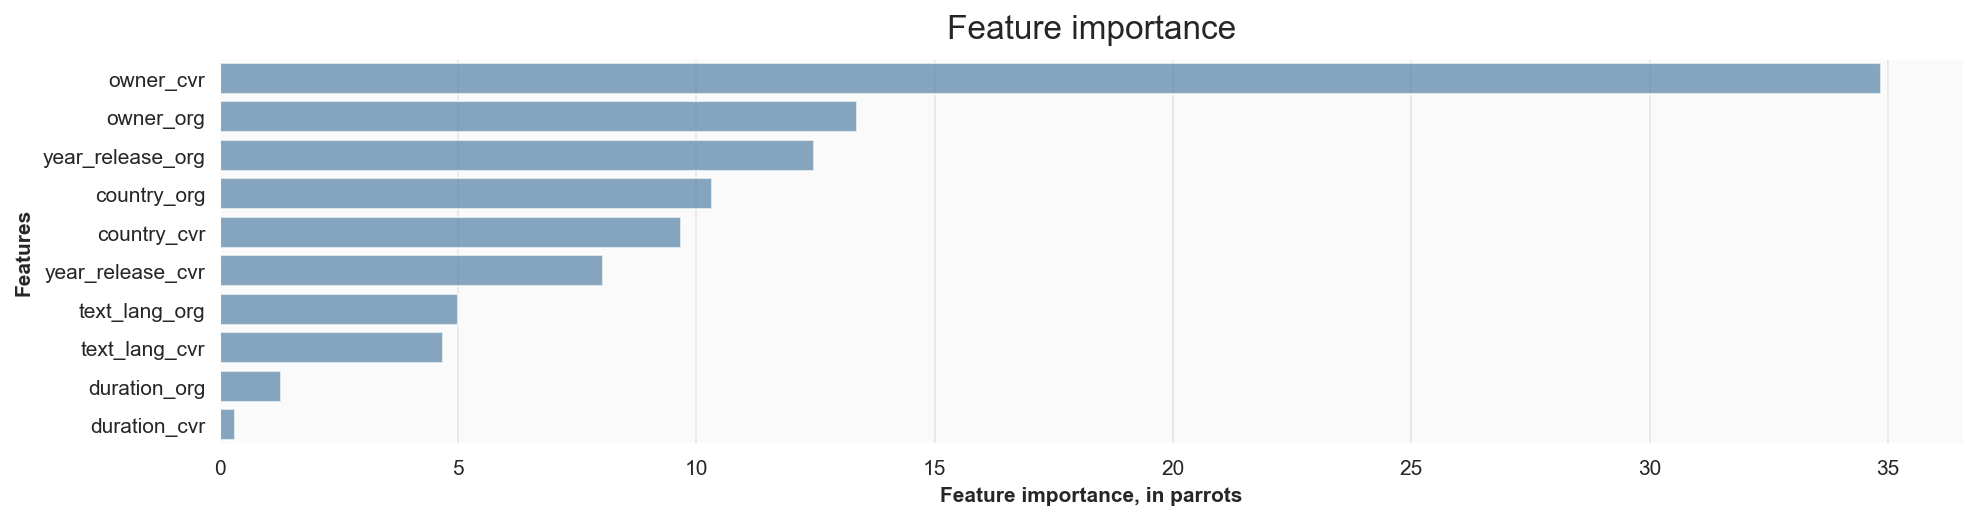

In [67]:
plot_feature_importance(model.feature_importances_, X_train.columns)

> Предполагалось, что `year_release` окажется наиболее значимым признаком.  
> Но в данных есть ошибки, когда оригинал датирован позднее, чем кавер. При таком маленьком датасете это может существенно сказаться на значимости признака.
>
> Встроенный метод расчета важности признаков выглядит не лучшим выбором.  
> Необходимо сравнить с другими методами.

## Тестирование

На валидационной выборке

### df_test

Выделение из общего датафрейма записей о треках, содержащихся в валидационной выборке.  
Модель видела эти данные только при контроле переобучения (не идеально, но для создания отдельной тестовой выборки крайне мало данных).

In [68]:
X_valid.sample(3)

,duration_org,country_org,owner_org,year_release_org,text_lang_org,duration_cvr,country_cvr,owner_cvr,year_release_cvr,text_lang_cvr
13,187220.000,US,FI8,1969,EN,139980.000,US,ASN,2017,EN
228,241680.000,IE,ACJ,2013,EN,266740.000,FR,1Q0,2020,EN
184,181270.000,GB,ULZ,2011,EN,172330.000,US,AT1,2000,EN


In [69]:
# valid_original_track_id — список с track_id оригиналов, содержащихся в валидационной выборке

df_test = data[data.original_track_id.isin(valid_original_track_id)]
df_test.shape

(181, 8)

In [70]:
df_test.sample()

,original_track_id,track_id,track_remake_type,duration,country,owner,year_release,text_lang
515,b9213d37c37deffe8b8af0dac5d0c3c4,cd4b82e967d4a937f66ec5ef57bec168,COVER,241580.000,US,SM1,2007,EN


In [71]:
# количество оригиналов (по сути — кластеров)
df_test.original_track_id.nunique()

27

### Ранжирование треков на примере одного из кластеров

Для примера выбран кластер с одним оригиналом и умеренным количеством каверов.  
Эти данные не использовались при обучении модели. Модель их видела только в качестве валидационной выборки, но сейчас можно этим пренебречь. Правильно, конечно, было бы выделить тестовую выборку, но данных крайне мало. Но можно, если сильно захотеть ))

*Этот подраздел предназначен для экспериментов с принципом действия и подробных комментариев.*  
*В следующем подразделе этот же принцип оформлен в виде функции, и сделан тест для всей тестовой выборки*.

In [72]:
# 5-й кластер, для примера
df_cluster = df_test[df_test.original_track_id == valid_original_track_id[5]]
df_cluster.shape

(7, 8)

In [73]:
# проверка количества оригиналов в кластере
df_cluster[df_cluster.track_id == valid_original_track_id[5]].shape[0]

1

In [74]:
# проверка количества каверов в кластере
df_cluster[df_cluster.track_id != valid_original_track_id[5]].shape[0]

6

In [75]:
# кросстаб: составление всех возможных пар в кластере

df_cross = df_cluster.merge(df_cluster, how='cross', suffixes=('_org', '_cvr'))  # cartesian product of both frames, preserves the order of left keys
df_cross = df_cross[df_cross.track_id_org != df_cross.track_id_cvr]              # удаление пар "сам-и-сам"
df_cross.shape

(42, 16)

In [76]:
df_cross.head(1)

,original_track_id_org,track_id_org,track_remake_type_org,duration_org,country_org,owner_org,year_release_org,text_lang_org,original_track_id_cvr,track_id_cvr,track_remake_type_cvr,duration_cvr,country_cvr,owner_cvr,year_release_cvr,text_lang_cvr
1,4923ebd6a888d3cbc94675089c732060,4923ebd6a888d3cbc94675089c732060,ORIGINAL,138820.000,US,RHD,2008,EN,4923ebd6a888d3cbc94675089c732060,622f5f0031496b39bd7dd5af91447e04,COVER,147400.000,US,AT2,2008,EN


In [77]:
# заполнение пропусков

num_features = df_cross.select_dtypes(include='number').columns.to_list()
cat_features = df_cross.select_dtypes(exclude='number').columns.to_list()

df_cross[num_features] = df_cross[num_features].fillna(0)
df_cross[cat_features] = df_cross[cat_features].fillna('unknown')

In [78]:
# удаление лишних признаков: id, таргет, "хвосты" соединений

X_test = df_cross.drop([
                        'original_track_id_org', 'original_track_id_cvr',
                        'track_id_org', 'track_id_cvr',
                        'track_remake_type_org', 'track_remake_type_cvr',
                       ], 
                       axis=1)

In [79]:
# прогноз вероятности, что каждый из треков в паре — оригинал

prediction = pd.DataFrame(columns=['track_id', 'prob'])                     # датафрейм для сбора всех прогнозов

for i in range(X_test.shape[0]):                                            # проход по всем составленным парам 

    track_id_left = df_cross.track_id_org.iloc[i]                           # id первого трека в паре
    track_id_right = df_cross.track_id_cvr.iloc[i]                          # id второго трека в паре
    
    prob_left = model.predict_proba(X_test.iloc[i])[1]                      # вероятность, что первый трек в паре — оригинал
    prob_right = model.predict_proba(X_test.iloc[i])[0]                     # вероятность, что второй трек в паре — оригинал

    prediction.loc[len(prediction)] = [track_id_left, prob_left]            # добавление в датафрейм для сбора прогнозов
    prediction.loc[len(prediction)] = [track_id_right, prob_right]

In [80]:
prediction.sample(3)

,track_id,prob
21,74ef1f51e7f03e1769d005db5792c961,0.238
76,87bd248a1d267fb17bfb5781ef79a2ca,0.301
20,622f5f0031496b39bd7dd5af91447e04,0.762


In [81]:
# группировка и усреднение прогноза по всем трекам кластера
# присоединение информации о треке

prediction.groupby('track_id').mean().reset_index().sort_values('prob', ascending=False).merge(data, on='track_id', how='left')

,track_id,prob,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,622f5f0031496b39bd7dd5af91447e04,0.709,4923ebd6a888d3cbc94675089c732060,COVER,147400.000,US,AT2,2008,EN
1,62cb99a8e5a8c3d1707f36b8ceff4533,0.696,4923ebd6a888d3cbc94675089c732060,COVER,140650.000,US,MO1,2001,EN
2,4923ebd6a888d3cbc94675089c732060,0.614,4923ebd6a888d3cbc94675089c732060,ORIGINAL,138820.000,US,RHD,2008,EN
3,74ef1f51e7f03e1769d005db5792c961,0.492,4923ebd6a888d3cbc94675089c732060,COVER,157100.000,US,RH1,2016,EN
4,87bd248a1d267fb17bfb5781ef79a2ca,0.388,4923ebd6a888d3cbc94675089c732060,COVER,132840.000,US,TR8,2007,NaN
5,699ba5f4ba6d07354cbb09e3deae2161,0.360,4923ebd6a888d3cbc94675089c732060,COVER,135480.000,US,DEA,2010,NaN
6,59f38eb3bc34d874e43b4e3fa794a593,0.240,4923ebd6a888d3cbc94675089c732060,COVER,146150.000,DE,BL6,2010,EN


> Модель не смогла правильно предсказать оригинал (поставить его на первое место в кластере).  
> Если посмотреть, вышестоящий кавер датирован более ранней датой, то есть налицо ошибка в данных (или в разметке).  
> Подобное встречается и в других кластерах. Можно предположить, что модель находит неверную разметку и предлагает более вероятный оригинал.  
> Например, в 21-м кластере из 13 треков все 12 каверов имеют более раннюю дату выхода, чем размеченный оригинал.

> Вероятность отражает среднюю вероятность во всех парах для определенного трека.  
> Сумма вероятностей треков, составляющих кластер, не равна 1.  
> Так удобнее, поскольку средняя вероятность не зависит от количества треков, и удобнее сравнивать кластеры с разным количеством треков.

### Ранжирование треков (функция)

In [82]:
def rank_cluster(df_cluster):
    '''
    df_cluster: датафрейм, содержащий отобранный кластер: каверы на один оригинал (оригинал может отсутствовать в конкретных данных)
    '''
    
    # кросстаб: составление всех возможных пар в кластере

    df_cross = df_cluster.merge(df_cluster, how='cross', suffixes=('_org', '_cvr'))  # cartesian product of frames, preserves the order of left key
    df_cross = df_cross[df_cross.track_id_org != df_cross.track_id_cvr]              # удаление пар "сам-и-сам"


    # заполнение пропусков
    
    num_features = df_cross.select_dtypes(include='number').columns.to_list()
    cat_features = df_cross.select_dtypes(exclude='number').columns.to_list()
    
    df_cross[num_features] = df_cross[num_features].fillna(0)
    df_cross[cat_features] = df_cross[cat_features].fillna('unknown')
    

    # удаление лишних признаков: id, таргет, "хвосты" соединений
    
    X_test = df_cross.drop([
                            'original_track_id_org', 'original_track_id_cvr',
                            'track_id_org', 'track_id_cvr',
                            'track_remake_type_org', 'track_remake_type_cvr',
                           ], 
                           axis=1)

    
    # прогноз вероятности, что каждый из треков в паре — оригинал

    prediction = pd.DataFrame(columns=['prob','track_id'])                      # датафрейм для сбора всех прогнозов
    
    for i in range(X_test.shape[0]):                                            # проход по всем составленным парам 
    
        track_id_left = df_cross.track_id_org.iloc[i]                           # id первого трека в паре
        track_id_right = df_cross.track_id_cvr.iloc[i]                          # id второго трека в паре
        
        prob_left = model.predict_proba(X_test.iloc[i])[1]                      # вероятность, что первый трек в паре — оригинал
        prob_right = model.predict_proba(X_test.iloc[i])[0]                     # вероятность, что второй трек в паре — оригинал
    
        prediction.loc[len(prediction)] = [prob_left, track_id_left]            # добавление в датафрейм для сбора прогнозов
        prediction.loc[len(prediction)] = [prob_right, track_id_right]


    # группировка и усреднение прогноза по всем трекам кластера
    # присоединение информации о треке
    
    df_result = (
                 prediction.groupby('track_id').mean().reset_index().sort_values('prob', ascending=False)
                 .merge(data, on='track_id', how='left')                                                       # данные о треке из объединенной таблицы data
                 .merge(data_meta[['track_id','title']], on='track_id', how='left')                            # название трека из таблицы data_meta
                )
    df_result = pd.concat([df_result[['prob','title']], df_result.drop(['prob','title'], axis=1)], axis=1)     # переставляет выбранные столбцы в начало датафрейма

    return df_result

In [83]:
for i in range(len(valid_original_track_id)):                                           # проход по всем оригиналам, попавшим в валидационную выборку
    
    df_cluster = df_test[df_test.original_track_id == valid_original_track_id[i]]       # выделение кластера, соответствующего выбранному оригиналу
    df_ranked = rank_cluster(df_cluster)                                                # функция ранжирования
    
    print(f'cluster {i}')
    display(df_ranked)

cluster 0


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.809,Proud Mary,eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL,187220.000,US,FI8,1969,EN
1,0.804,Proud Mary,e3fa439cac2293992eb337189e73acbb,eeb69a3cb92300456b6a5f4162093851,COVER,164670.000,GB,BBA,1970,EN
2,0.803,Proud Mary,c99604698f81b2454389e8e3b6d3520b,eeb69a3cb92300456b6a5f4162093851,COVER,327390.000,GB,AYE,1993,EN
3,0.758,Proud Mary,ecc749ddb382d52c1161e517d878d8d6,eeb69a3cb92300456b6a5f4162093851,COVER,221460.000,US,QX9,2009,EN
4,0.711,Proud Mary,b5f9882ee2f5ba91089e3fcaf47ed061,eeb69a3cb92300456b6a5f4162093851,COVER,198000.000,US,UM7,2015,EN
5,0.675,Proud Mary,0c0442e572f4dbe1f20092c4213aa776,eeb69a3cb92300456b6a5f4162093851,COVER,139980.000,US,ASN,2017,EN
6,0.600,Proud Mary,b3728c3e3ba2282e328eba4f6ce787f6,eeb69a3cb92300456b6a5f4162093851,COVER,172800.000,DK,5C5,2000,EN
7,0.587,Proud Mary,4afebf02f0ef97c411782c836113985e,eeb69a3cb92300456b6a5f4162093851,COVER,297620.000,US,GZ2,2006,NaN
8,0.575,Proud Mary,fb9c2a1609c3cd925c7360340476ed4b,eeb69a3cb92300456b6a5f4162093851,COVER,155610.000,US,AR4,2020,EN
9,0.550,Proud Mary,e58d2c71ff16648513a9c727281fb474,eeb69a3cb92300456b6a5f4162093851,COVER,155350.000,FR,6V8,2000,EN


cluster 1


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.929,Say It Right,b785f0c8bacf5ff5809928e60934704b,b785f0c8bacf5ff5809928e60934704b,ORIGINAL,214850.000,US,UM7,2006,EN
1,0.071,Say It Right,e583e57e2bcc98fe35aa4769f3c9f4bb,b785f0c8bacf5ff5809928e60934704b,COVER,126680.000,AT,EK0,2021,EN


cluster 2


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.949,She Works Hard For The Money,244b0c93b290a9c469f42f678eb21cd8,244b0c93b290a9c469f42f678eb21cd8,ORIGINAL,317810.000,US,PR3,1994,EN
1,0.051,She Works Hard For The Money,087bde78ec3ac3d6958a9822c6e3e24b,244b0c93b290a9c469f42f678eb21cd8,COVER,228280.000,FR,1Q0,2020,NaN


cluster 3


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.924,Say It Right,93e27b2b102bb4e2b3dc76f91944ada8,93e27b2b102bb4e2b3dc76f91944ada8,ORIGINAL,223080.000,US,UM7,2006,EN
1,0.343,Say It Right,ad31eb630fc4a8042d313a4bea1a0c47,93e27b2b102bb4e2b3dc76f91944ada8,COVER,348190.000,US,83Z,2020,NaN
2,0.233,Say It Right,ef61137a7041555617f410205d4e21c6,93e27b2b102bb4e2b3dc76f91944ada8,COVER,165500.000,QZ,MHP,2020,EN


cluster 4


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.850,Wicked Game,f3e5e9db509f9b6f6d93b9c38e4e1324,f3e5e9db509f9b6f6d93b9c38e4e1324,ORIGINAL,286870.000,US,RE1,2006,EN
1,0.821,Wicked Game,28efa5567f2b3c090f311a3cb8805082,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,262940.000,GB,BXG,2007,EN
2,0.803,Wicked Games,c7c21c473ebdb4c8dd1fa4771b061b3a,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,215030.000,US,UYG,2010,EN
3,0.793,Wicked Game,0c51eed48d3e26e693bb1554b22e32af,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,251880.000,US,8YA,2011,EN
4,0.776,Wicked Game,fd37983a6117fa525d9a35d17120652c,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,236000.000,GB,CFB,2013,EN
5,0.737,Wicked Game,f73c52d1de99fc426886378990f90a4f,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,220400.000,US,ADE,2017,EN
6,0.731,Wicked Game,755f08335f8436fafd3806fe9c5b867a,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,284800.000,GB,KPL,2016,EN
7,0.644,Wicked Game,d71bd79936e69ffeb21ef6dd62e55b2e,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,233730.000,FI,BAR,1997,EN
8,0.636,Wicked Game,073f9e9d92666ff30bdf6e7ea97208e9,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,188290.000,US,A2P,2020,EN
9,0.619,Wicked Game,c2fd70052a8733d7a0ae831f1019b8cc,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,191080.000,US,M95,2021,EN


cluster 5


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.709,Respect,622f5f0031496b39bd7dd5af91447e04,4923ebd6a888d3cbc94675089c732060,COVER,147400.000,US,AT2,2008,EN
1,0.696,Respect,62cb99a8e5a8c3d1707f36b8ceff4533,4923ebd6a888d3cbc94675089c732060,COVER,140650.000,US,MO1,2001,EN
2,0.614,Respect,4923ebd6a888d3cbc94675089c732060,4923ebd6a888d3cbc94675089c732060,ORIGINAL,138820.000,US,RHD,2008,EN
3,0.492,Respect,74ef1f51e7f03e1769d005db5792c961,4923ebd6a888d3cbc94675089c732060,COVER,157100.000,US,RH1,2016,EN
4,0.388,Respect,87bd248a1d267fb17bfb5781ef79a2ca,4923ebd6a888d3cbc94675089c732060,COVER,132840.000,US,TR8,2007,NaN
5,0.360,Respect,699ba5f4ba6d07354cbb09e3deae2161,4923ebd6a888d3cbc94675089c732060,COVER,135480.000,US,DEA,2010,NaN
6,0.240,Respect,59f38eb3bc34d874e43b4e3fa794a593,4923ebd6a888d3cbc94675089c732060,COVER,146150.000,DE,BL6,2010,EN


cluster 6


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.938,Crazy,5118cc80232e26de1b5b0068bf134c52,5118cc80232e26de1b5b0068bf134c52,ORIGINAL,180760.000,GB,AHT,2006,EN
1,0.062,Crazy,d15e5178d506843790420456895d1c63,5118cc80232e26de1b5b0068bf134c52,COVER,161830.000,QZ,MHL,2020,EN


cluster 7


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.843,Smooth Criminal,9050384cce6c221c39d6e25d02561612,9050384cce6c221c39d6e25d02561612,ORIGINAL,257060.000,US,SM1,1999,EN
1,0.799,Smooth Criminal,b0578731d66c058b5ec460d2a2f6308d,9050384cce6c221c39d6e25d02561612,COVER,204000.000,US,E83,2009,EN
2,0.772,Smooth Criminal,53bf57b9e4d3eed991f57a603a41c9d4,9050384cce6c221c39d6e25d02561612,COVER,214640.000,US,QX9,2012,EN
3,0.768,Smooth Criminal,33e93525fc3c88ba32de4862bf0ed90f,9050384cce6c221c39d6e25d02561612,COVER,210050.000,US,A56,2014,EN
4,0.768,Smooth Criminal,8a784da40593f40adf5e1c3df7e5b11c,9050384cce6c221c39d6e25d02561612,COVER,210060.000,US,V35,2014,EN
5,0.637,Smooth Criminal,82912a814361b8250e8ca7faed5f313d,9050384cce6c221c39d6e25d02561612,COVER,206990.000,US,DEI,2001,NaN
6,0.611,Smooth Criminal,501e255f493fba53a13368faa758b32a,9050384cce6c221c39d6e25d02561612,COVER,205060.000,US,K4W,2007,NaN
7,0.600,Smooth Criminal,d17e9bb00f2befee8c6285226d854872,9050384cce6c221c39d6e25d02561612,COVER,282940.000,IT,T24,2013,EN
8,0.583,Smooth Criminal,fe8240953452ea1eb452728fd309182c,9050384cce6c221c39d6e25d02561612,COVER,233900.000,US,A56,2010,NaN
9,0.564,Smooth Criminal,c5f8b6bcc11a50179d8226eb71ffd5d2,9050384cce6c221c39d6e25d02561612,COVER,206340.000,GB,YUE,2012,NaN


cluster 8


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.911,The A Team,d5fd69bc6476f94fc23879601e33b8a3,d5fd69bc6476f94fc23879601e33b8a3,ORIGINAL,258350.000,GB,AHS,2011,EN
1,0.089,The A Team,9c29e7144e88ea6aff98d1386e3dc508,d5fd69bc6476f94fc23879601e33b8a3,COVER,269800.000,FR,1Q0,2020,EN


cluster 9


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.785,Stand by Me,06f2df4b7430b6353d4eacac5e39885b,0fcb82fec458a0993f848200548eaaa0,COVER,172330.000,US,AT1,2000,EN
1,0.727,Stand by Me,292724f1405ca5758900daf231bf44ec,0fcb82fec458a0993f848200548eaaa0,COVER,242800.000,US,WB1,2008,EN
2,0.711,Stand By Me,57e03c37397337e2a973145738c34b75,0fcb82fec458a0993f848200548eaaa0,COVER,211660.000,GB,AYE,2010,EN
3,0.710,Stand By Me,9662d1aa25741f01128f5f416a90d4bf,0fcb82fec458a0993f848200548eaaa0,COVER,364270.000,US,HC4,2010,EN
4,0.695,Stand By Me,0fcb82fec458a0993f848200548eaaa0,0fcb82fec458a0993f848200548eaaa0,ORIGINAL,181270.000,GB,ULZ,2011,EN
5,0.648,Stand By Me,a676eee3371962f7158f892701a8c218,0fcb82fec458a0993f848200548eaaa0,COVER,245780.000,GB,UM7,2016,EN
6,0.628,Stand by Me,63072ddadbe08dbc2e9b8e3a6cf7de07,0fcb82fec458a0993f848200548eaaa0,COVER,187870.000,US,A3N,2016,EN
7,0.574,Stand By Me,746ce35c091f1f19828356df3b8d9dc8,0fcb82fec458a0993f848200548eaaa0,COVER,146440.000,US,UM7,2018,EN
8,0.481,Stand by Me,41e0775c05a394e25575d5cc9f104ab6,0fcb82fec458a0993f848200548eaaa0,COVER,199010.000,US,M95,2021,EN
9,0.402,Stand By Me,d14ed567cba53ac6ee7c133b7ac26763,0fcb82fec458a0993f848200548eaaa0,COVER,179980.000,US,A37,2015,NaN


cluster 10


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.936,Diamonds,0c39f5d94bd527c0a6fd09bee131cffa,0c39f5d94bd527c0a6fd09bee131cffa,ORIGINAL,225140.000,US,UM7,2012,EN
1,0.360,diamonds,e44170258ffe31467836b190ea039aa6,0c39f5d94bd527c0a6fd09bee131cffa,COVER,155130.000,QZ,HN7,2021,EN
2,0.204,Diamonds,86f1aff8c191baf6957fcda82fe6b3c3,0c39f5d94bd527c0a6fd09bee131cffa,COVER,281980.000,ES,50A,2019,NaN


cluster 11


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.883,All The Things She Said,17d7017dc7c7209af086203723776436,17d7017dc7c7209af086203723776436,ORIGINAL,214440.000,RU,A11,2001,EN
1,0.117,All the Things She Said,da3100bf59562ec131051daf0de4705e,17d7017dc7c7209af086203723776436,COVER,250580.000,FR,1Q0,2020,EN


cluster 12


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.919,Sweater Weather,79cdf746d497fc32a2de41b710ad9de9,79cdf746d497fc32a2de41b710ad9de9,ORIGINAL,240400.000,US,SM1,2013,EN
1,0.081,sweater weather,b3598ccef171c849068e6719e9d6afba,79cdf746d497fc32a2de41b710ad9de9,COVER,135170.000,QZ,HN7,2021,EN


cluster 13


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.945,Young And Beautiful,d31241f89e316c4fa6ba986f1b1d160a,d31241f89e316c4fa6ba986f1b1d160a,ORIGINAL,236050.000,GB,UM7,2013,EN
1,0.055,young and beautiful,2b76e185eda9e1f06d6ec8de5e6cbb9b,d31241f89e316c4fa6ba986f1b1d160a,COVER,130900.000,QZ,MEQ,2021,NaN


cluster 14


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.715,Take Me To Church,ae5a8bc6f09b4bcfd1d55f39425bd2f6,ae5a8bc6f09b4bcfd1d55f39425bd2f6,ORIGINAL,241680.000,IE,ACJ,2013,EN
1,0.285,Take Me to Church,952f143c6b7df856a341cd101f986d37,ae5a8bc6f09b4bcfd1d55f39425bd2f6,COVER,266740.000,FR,1Q0,2020,EN


cluster 15


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.756,Total Eclipse of the Heart,b4b2546344f37a958e40d9dbdbf021c4,b4b2546344f37a958e40d9dbdbf021c4,ORIGINAL,230690.000,FR,54E,2005,EN
1,0.244,Total Eclipse of the Heart,a807aeba8ebc3ca11390451be9b1e3f8,b4b2546344f37a958e40d9dbdbf021c4,COVER,277040.000,FR,1Q0,2020,EN


cluster 16


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.870,Stressed Out,d95f85cae937dc1f59b70d125f6d2828,d95f85cae937dc1f59b70d125f6d2828,ORIGINAL,202330.000,US,AT2,2015,EN
1,0.130,Stressed Out,19233a8026d9ee59c91e1dfc02b8481c,d95f85cae937dc1f59b70d125f6d2828,COVER,251960.000,QM,FMF,2015,EN


cluster 17


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.500,Reality,17df7b240af924f49e8d8cecb1ec02a5,2398589f134c0086c4f33519285b2b35,COVER,159930.000,NL,F71,2015,EN
1,0.500,Reality,2398589f134c0086c4f33519285b2b35,2398589f134c0086c4f33519285b2b35,ORIGINAL,158470.000,NL,F71,2015,EN


cluster 18


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.961,The Man Who Sold The World,0a2a1b3bdc53ae9ab0c2f601b098c68d,684c7772ff3e8ec3a8ffe317b791afd9,COVER,227460.000,US,GF1,1999,EN
1,0.785,The Man Who Sold The World,13995f443848894c3403af27ef0fc958,684c7772ff3e8ec3a8ffe317b791afd9,COVER,231990.000,GB,AJE,1974,EN
2,0.784,The Man Who Sold the World,4fca5f01691d648dcd667ef073b763bb,684c7772ff3e8ec3a8ffe317b791afd9,COVER,247860.000,GB,CBR,2001,EN
3,0.685,The Man Who Sold the World,684c7772ff3e8ec3a8ffe317b791afd9,684c7772ff3e8ec3a8ffe317b791afd9,ORIGINAL,241340.000,US,JT1,2015,EN
4,0.560,The Man Who Sold the World,4498205993d413be2096325be3194476,684c7772ff3e8ec3a8ffe317b791afd9,COVER,208480.000,GB,EQT,2021,EN
5,0.514,The Man Who Sold the World,44ae72839393ce0373339f24dab11e29,684c7772ff3e8ec3a8ffe317b791afd9,COVER,215470.000,GB,QRF,2013,NaN
6,0.505,"Бизнесмен, что продал мир",0c4c009b006de86f1f2f45542d853ed1,684c7772ff3e8ec3a8ffe317b791afd9,COVER,232460.000,RU,UM7,2021,RU
7,0.398,The Man Who Sold the World,01fd87679fd1d27b65b3e2cf2ee76f44,684c7772ff3e8ec3a8ffe317b791afd9,COVER,245310.000,US,L4Q,2019,NaN
8,0.393,Man Who Sold the World,0ac7dc1beeb4c101c9c37f19950493cf,684c7772ff3e8ec3a8ffe317b791afd9,COVER,211980.000,US,HM9,2020,NaN
9,0.333,The Man Who Sold The World,3e945509aebc33185a973519d894a90d,684c7772ff3e8ec3a8ffe317b791afd9,COVER,244000.000,NL,RD5,2014,NaN


cluster 19


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.829,Ты не верь слезам,7b7e7113c2c2eeb04b70c6943dd9077a,7b7e7113c2c2eeb04b70c6943dd9077a,ORIGINAL,191600.000,RU,B42,2013,RU
1,0.171,Не верь слезам,19f76a0605fb056c2a263ab220cb22d1,7b7e7113c2c2eeb04b70c6943dd9077a,COVER,288410.000,RU,UM7,2020,RU


cluster 20


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.887,Believer,371380c62849548617f1ef5debef2a5c,371380c62849548617f1ef5debef2a5c,ORIGINAL,204330.000,US,UM7,2017,EN
1,0.113,Believer,8a7c1f7621abcb9f39331451486220ac,371380c62849548617f1ef5debef2a5c,COVER,282890.000,FR,1Q0,2020,EN


cluster 21


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.651,Everlasting Love,a6d33ac4118d07be5f11c34a118244b8,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,241080.000,US,SM1,1994,EN
1,0.650,Everlasting Love,d1b9dda73d62a6e9d3c1a9d07b9d5b2d,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,181900.000,GB,BBN,1967,EN
2,0.649,Everlasting Love,7c9052caed90949c46c171951cd9dc3d,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,199330.000,GB,AAN,1989,EN
3,0.649,Everlasting Love,a106cea5c02ed8a70b421831cc4e7192,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,153940.000,US,MC1,1974,EN
4,0.649,Everlasting Love,0021519c8533f1116591948bbb349aef,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,241500.000,US,SM1,2000,EN
5,0.649,Everlasting Love,58a293c4c86b4c0000b0e683c77432a8,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,182860.000,US,MO1,2004,EN
6,0.646,Everlasting Love,79eb48bb4409051aab1602e390c98736,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,202340.000,GB,EKZ,2004,EN
7,0.598,Everlasting Love,cd4b82e967d4a937f66ec5ef57bec168,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,241580.000,US,SM1,2007,EN
8,0.317,Everlasting Love,f9856ecd215642c46ec691fc95fe210f,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,221100.000,DE,G12,1992,EN
9,0.316,Everlasting Love,c4da5795e1e9d7ee001845e5cf07030b,b9213d37c37deffe8b8af0dac5d0c3c4,COVER,228400.000,FR,Z11,2007,EN


cluster 22


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.653,Arcade,11ffce9da6aaa76f92173c8a802dd398,11ffce9da6aaa76f92173c8a802dd398,ORIGINAL,185140.000,NL,1TK,2019,EN
1,0.570,loving you is a losing game,34ee25451b366a3747aa1fb99a137603,11ffce9da6aaa76f92173c8a802dd398,COVER,100000.000,QZ,MEM,2021,EN
2,0.277,arcade,1c096f0a6548a2526e90b5ae495c0115,11ffce9da6aaa76f92173c8a802dd398,COVER,112290.000,QZ,MEQ,2021,NaN


cluster 23


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.881,bad guy,a2ada6b9c60d53345e052b47a2301769,a2ada6b9c60d53345e052b47a2301769,ORIGINAL,194080.000,US,UM7,2019,EN
1,0.119,Bad Guy,9079084e0f26ebf1eb3f94beb450aca9,a2ada6b9c60d53345e052b47a2301769,COVER,158550.000,QM,3EF,2021,EN


cluster 24


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.503,Dance Monkey,34c31a4b0f1b0775d4d61e803e8da371,1402816417b3a4bf639c84a95187141e,COVER,231960.000,FR,1Q0,2020,EN
1,0.497,Dance Monkey,1402816417b3a4bf639c84a95187141e,1402816417b3a4bf639c84a95187141e,ORIGINAL,209430.000,QZ,ES7,2019,EN


cluster 25


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.598,Комета,6a2c2a9843ab5cf8cbbafdc9fa449499,6a2c2a9843ab5cf8cbbafdc9fa449499,ORIGINAL,161050.000,FR,96X,2019,RU
1,0.402,Комета,d8b8b3b8e2b5eece408f243d986c3f7a,6a2c2a9843ab5cf8cbbafdc9fa449499,COVER,154810.000,TC,AEL,2019,RU


cluster 26


,prob,title,track_id,original_track_id,track_remake_type,duration,country,owner,year_release,text_lang
0,0.510,Where Are You Now,87053d8907b7400e10583a42bfc53dc5,87053d8907b7400e10583a42bfc53dc5,ORIGINAL,148190.000,BE,HP4,2021,EN
1,0.490,Where Are You Now,43ce0704682f427aecb94df3568ce6f0,87053d8907b7400e10583a42bfc53dc5,COVER,254730.000,BE,HP4,2021,EN


> В 21-м кластере из 13 треков все 12 каверов имеют более раннюю дату выхода, чем размеченный оригинал.  
> Модель поставила размеченный оригинал на последнее место в списке.

## Кластеризация

### text to embeds

Преобразование текстов треков в эмбединги.

In [84]:
%%time

if os.path.exists(os.path.join(PATH_DATA, 'text_embeddings.csv')):                              # если эмбединги закодированы и сохранены ранее
    df_text_embeddings = pd.read_csv(os.path.join(PATH_DATA, 'text_embeddings.csv'))

else:
    text_transformer = SentenceTransformer('sentence-transformers/LaBSE')
    df_text_embeddings = text_transformer.encode(
                                                 data_lyrics.text[:10],
                                                 show_progress_bar=True,
                                                 device=DEVICE,
                                                 batch_size=32,
                                                )
    df_text_embeddings = pd.DataFrame(df_text_embeddings)                                       # преобразование массива в датафрейм
    df_text_embeddings = pd.concat([data_lyrics['track_id'], df_text_embeddings], axis=1)       # соединение track_id с эмбедингами
    
    df_text_embeddings.to_csv(os.path.join(PATH_DATA, 'text_embeddings.csv'), index=False)

CPU times: total: 1.37 s
Wall time: 1.37 s


In [85]:
df_text_embeddings.head(3)

,track_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,...,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,1c4b1230f937e4c548ff732523214dcd,-0.056,-0.054,-0.048,-0.067,0.006,0.007,-0.072,-0.001,-0.015,0.012,0.003,-0.065,-0.056,-0.029,0.010,-0.044,-0.023,0.010,-0.041,-0.012,0.012,-0.069,-0.047,-0.026,0.026,-0.024,-0.024,-0.011,-0.061,0.017,-0.040,-0.012,-0.003,-0.037,-0.047,-0.053,-0.030,-0.047,0.003,-0.064,0.026,-0.061,-0.058,-0.038,-0.067,-0.063,-0.002,-0.044,-0.063,...,-0.030,-0.046,-0.021,0.017,0.010,-0.038,-0.059,-0.013,-0.028,-0.039,-0.057,-0.042,0.001,0.005,-0.051,-0.061,-0.012,-0.008,-0.045,-0.015,-0.016,-0.024,-0.055,0.052,-0.023,-0.038,-0.023,-0.009,0.013,0.013,-0.011,-0.001,0.022,-0.024,-0.049,0.032,-0.059,-0.005,-0.046,-0.036,-0.020,0.009,-0.062,-0.006,-0.028,-0.023,-0.021,-0.048,-0.063,-0.063
1,0faea89b0d7d6235b5b74def72511bd8,-0.061,-0.044,-0.058,-0.052,-0.019,-0.002,-0.038,0.004,-0.007,-0.008,-0.058,-0.038,-0.057,-0.022,0.013,-0.021,0.049,0.023,-0.037,0.007,-0.016,0.010,-0.031,0.035,-0.055,-0.049,-0.013,0.004,-0.078,0.046,0.041,-0.041,0.015,0.033,-0.033,-0.041,0.005,-0.043,0.042,-0.039,0.038,-0.059,-0.043,-0.038,0.031,-0.048,-0.019,0.042,-0.076,...,0.021,0.049,0.029,0.022,-0.013,-0.002,-0.041,0.021,-0.021,-0.026,0.015,0.020,-0.024,0.010,0.005,-0.058,-0.038,-0.038,-0.048,-0.016,-0.039,0.014,-0.017,0.067,0.001,-0.032,-0.014,-0.004,-0.028,0.031,-0.035,-0.024,0.013,-0.043,-0.055,-0.017,-0.042,-0.002,0.022,-0.013,0.030,-0.052,-0.040,0.018,-0.061,-0.034,-0.034,0.039,0.016,-0.031
2,9c6dc41d5ccd9968d07f055da5d8f741,-0.052,-0.043,-0.014,-0.064,0.002,-0.022,-0.066,0.039,-0.017,-0.017,-0.013,-0.036,-0.049,-0.053,0.010,0.026,0.055,0.025,-0.055,0.017,0.038,-0.057,-0.026,0.030,-0.045,-0.058,0.036,0.010,-0.063,0.028,0.001,-0.003,-0.004,-0.048,-0.028,-0.048,-0.059,-0.003,0.024,-0.041,0.061,-0.064,-0.038,-0.026,0.017,-0.045,-0.037,0.009,-0.061,...,-0.063,-0.011,-0.016,0.051,-0.016,-0.064,-0.038,-0.028,-0.064,-0.027,-0.039,-0.052,0.017,-0.009,-0.031,-0.052,-0.015,-0.012,-0.050,-0.022,-0.039,-0.046,-0.026,0.059,-0.016,-0.015,0.045,-0.006,-0.038,-0.014,-0.039,-0.012,-0.021,-0.053,0.003,0.052,-0.032,0.002,-0.045,0.016,0.004,-0.034,-0.023,-0.001,-0.031,-0.037,-0.059,-0.024,-0.062,-0.053


### DBSCAN

In [86]:
# from sklearn.cluster import DBSCAN

In [87]:
# X = df_text_embeddings.drop('track_id', axis=1)

In [88]:
# df_clusters = DBSCAN(eps=0.3, min_samples=1, n_jobs=-1).fit(X)

In [89]:
# df_clusters.labels_

### FAISS

#### Создание

In [90]:
# все доступные тексты
X = df_text_embeddings.drop('track_id', axis=1)

In [91]:
# "плоский" индекс для простоты и точности 
index = faiss.IndexFlatL2(X.shape[1])

In [92]:
index.add(np.ascontiguousarray(X))

#### Поиск

In [93]:
# отбор полных размеченных кластеров (есть оригнинал и не менее 1 кавера)

df_original = data[data.track_remake_type == 'ORIGINAL']
df_cover = data[data.track_remake_type == 'COVER']

df_labeled = df_original.merge(df_cover, left_on='track_id', right_on='original_track_id', suffixes=('_org', '_cvr'))

In [94]:
# список track_id, входящих в полные размеченные кластеры

labeled_track_id = list(df_labeled.track_id_org.unique()) + list(df_labeled.track_id_cvr.unique())    # список оригиналов + список соответствующих им каверов
len(labeled_track_id)

344

In [95]:
# список track_id, входящих в полные размеченные кластеры и (!) имеющих текст (ранее трансформированный в эмбединг)
df_search = df_text_embeddings[df_text_embeddings.track_id.isin(labeled_track_id)].drop('track_id', axis=1)

df_search .shape

(235, 768)

In [96]:
%%time

N_TOP = 50

distances, indices = index.search(np.ascontiguousarray(df_search), N_TOP)
distances = pd.DataFrame(distances)

distances.shape

CPU times: total: 234 ms
Wall time: 72 ms


(235, 50)

In [97]:
distances.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.000,0.000,0.140,0.522,0.538,0.551,0.554,0.560,0.560,0.562,0.564,0.567,0.568,0.569,0.570,0.573,0.577,0.577,0.579,0.579,0.579,0.580,0.580,0.580,0.583,0.585,0.586,0.587,0.592,0.593,0.593,0.595,0.595,0.595,0.595,0.595,0.596,0.599,0.600,0.600,0.600,0.603,0.604,0.605,0.605,0.607,0.608,0.608,0.609,0.611
1,0.000,0.038,0.048,0.051,0.061,0.070,0.089,0.103,0.134,0.135,0.174,0.184,0.245,0.276,0.286,0.325,0.541,0.557,0.579,0.579,0.588,0.589,0.589,0.590,0.595,0.607,0.607,0.607,0.611,0.612,0.621,0.624,0.624,0.627,0.628,0.631,0.632,0.634,0.634,0.635,0.637,0.639,0.639,0.643,0.645,0.645,0.648,0.648,0.648,0.648
2,0.000,0.024,0.030,0.038,0.041,0.049,0.049,0.050,0.058,0.064,0.068,0.113,0.135,0.167,0.183,0.184,0.269,0.331,0.427,0.439,0.439,0.440,0.446,0.447,0.453,0.456,0.460,0.469,0.474,0.474,0.478,0.479,0.486,0.488,0.489,0.492,0.492,0.494,0.495,0.495,0.495,0.495,0.496,0.497,0.497,0.501,0.501,0.502,0.502,0.503


#### Оценка порога (максимального расстояния) отнесения пары треков к одному кластеру

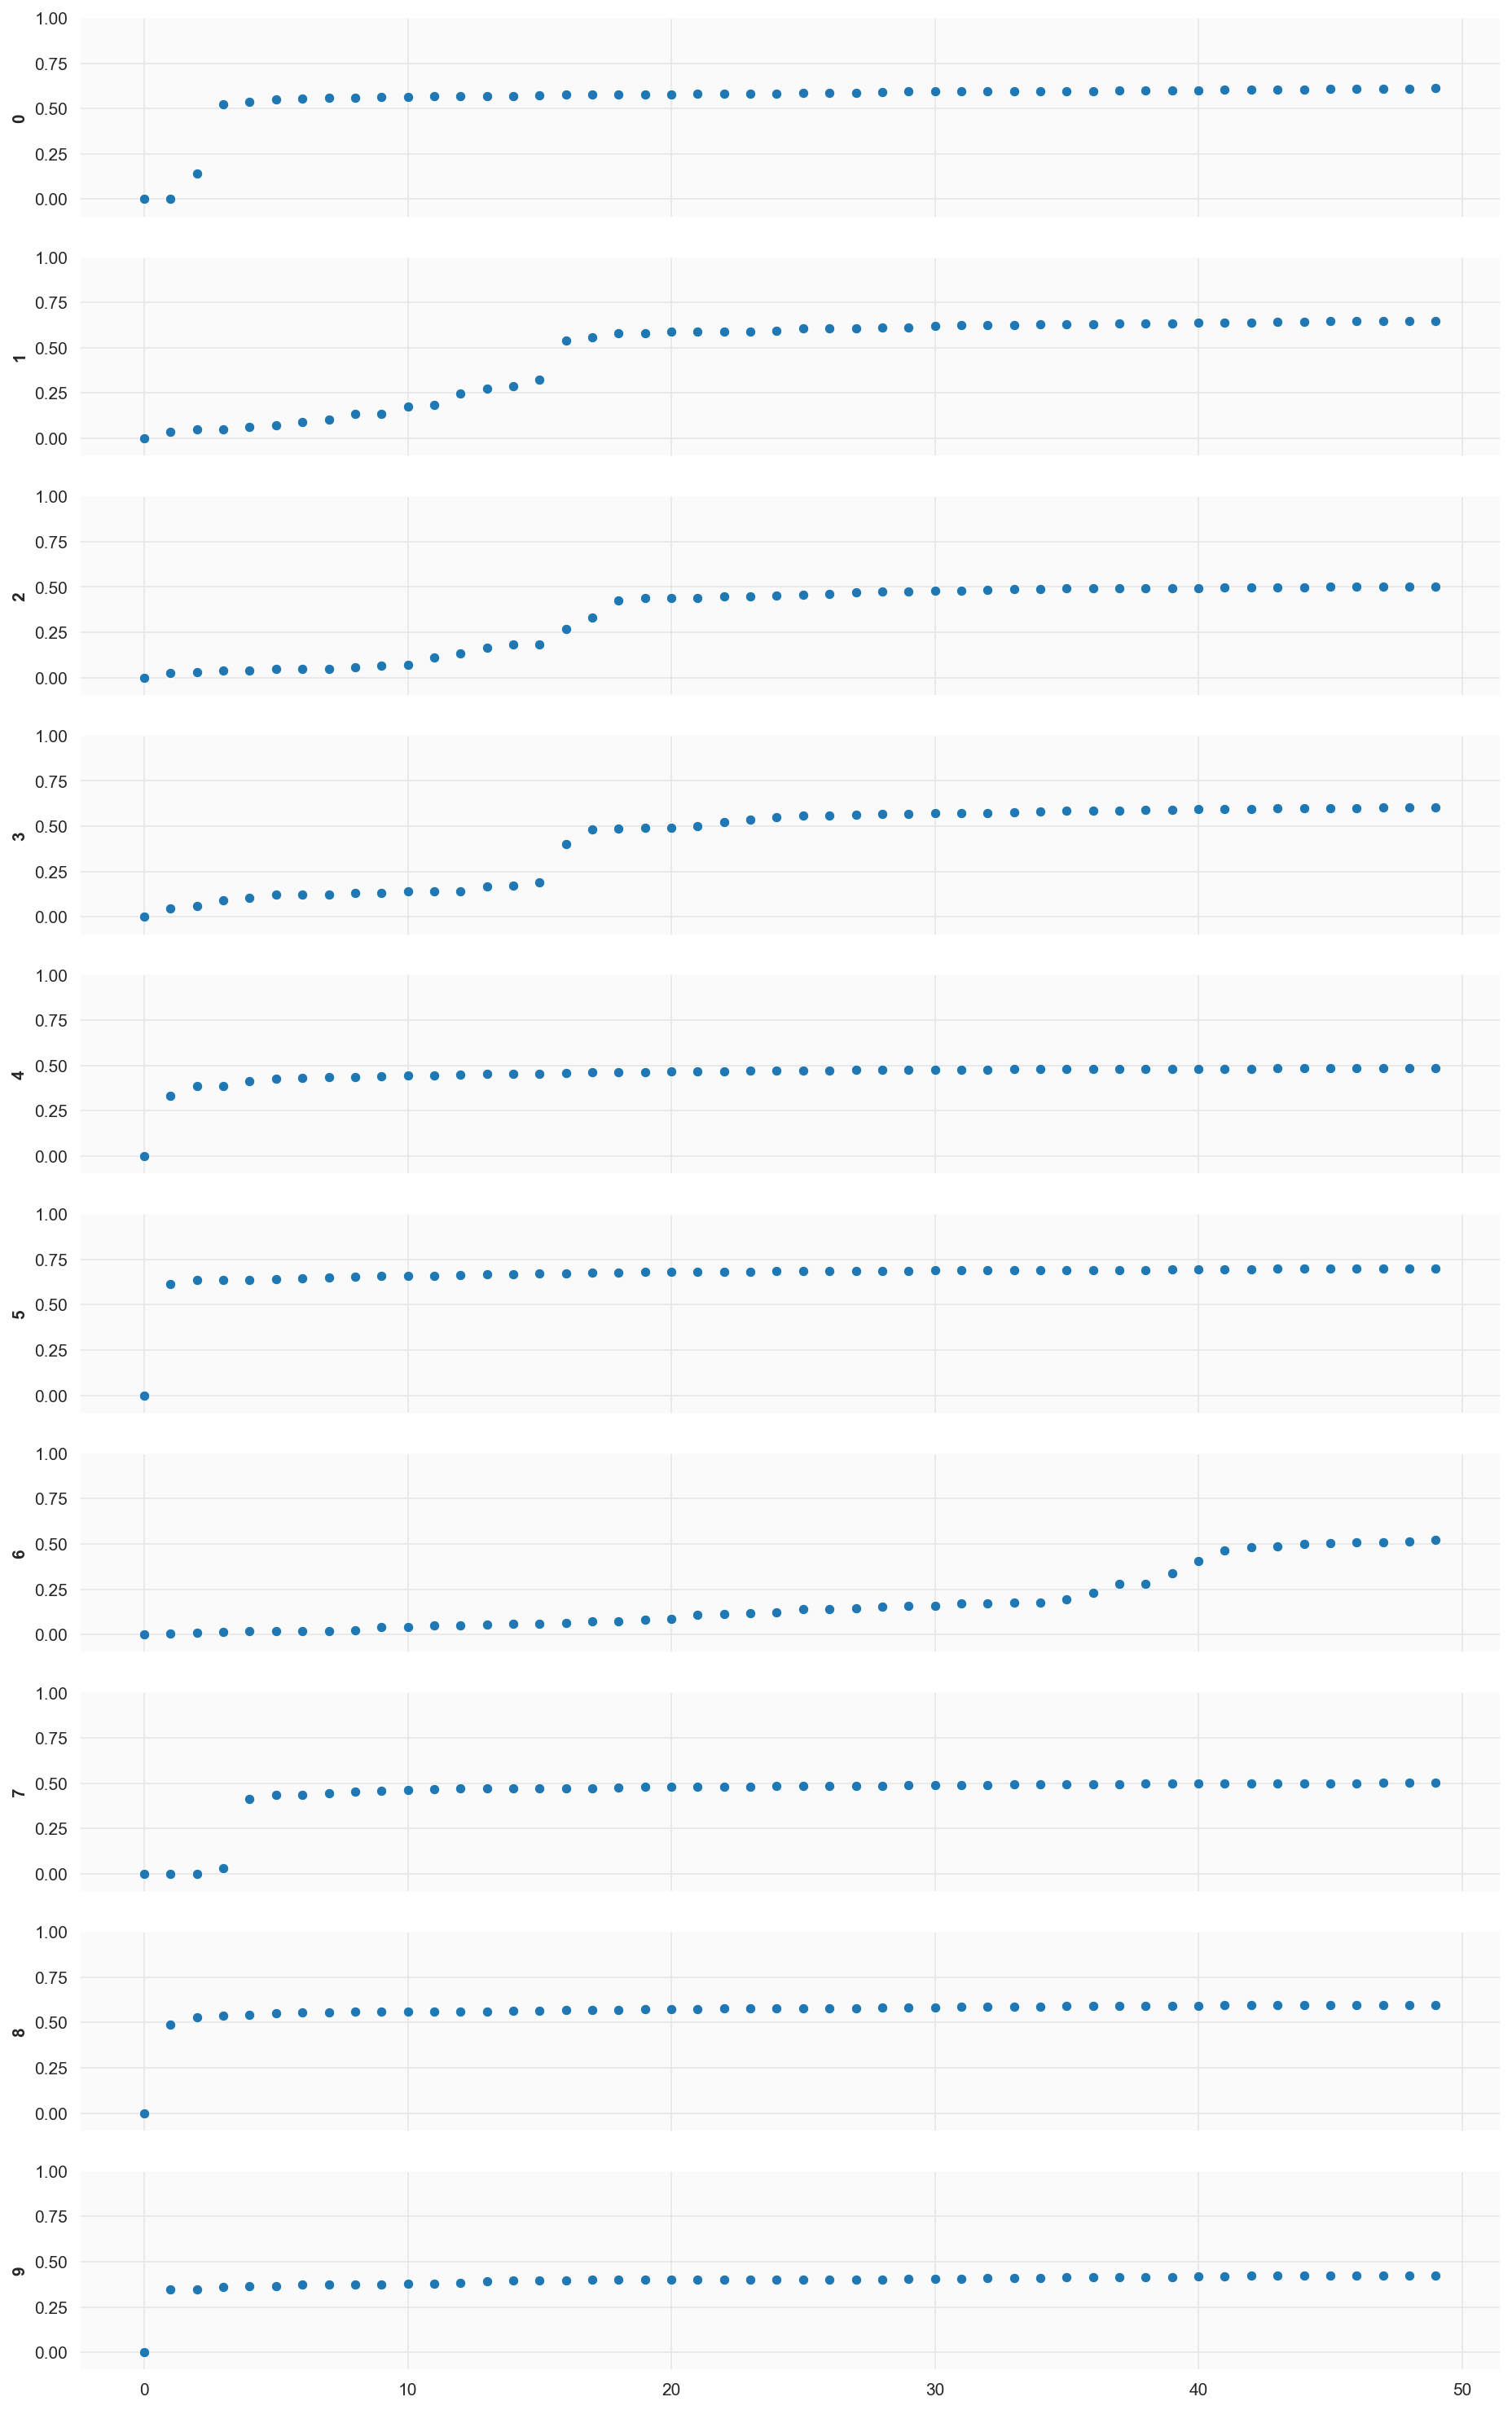

In [98]:
df = distances.head(10)
# df = distances.sample(10)
n_charts = df.shape[0]

fig, ax = plt.subplots(figsize=(15, 2.5*n_charts), nrows=n_charts, sharex=True, dpi=PLOT_DPI)

# Визуальное определение порога отнесения пары треков к кластеру
for i in range(df.shape[0]):
    sns.scatterplot(df.iloc[i], ax=ax[i])
    ax[i].set_ylim(-0.1,1)
    # plt.suptitle('Визуальное определение порога отнесения пары треков к кластеру');